In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import networkx as nx
from networkx.algorithms import bipartite
import community as community_louvain
import community.community_louvain as community_louvain
from collections import Counter
from collections import defaultdict

In [ ]:
# !pip install infomap

# **1. Data Import**

## **1.1 Data Biparted**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DataColab/Marvel_2graf(source-target).csv", sep=";")
df

source               target
0        Iron Man          Jon Favreau
1        Iron Man    Robert Downey Jr.
2        Iron Man      Terrence Howard
3        Iron Man      Gwyneth Paltrow
4        Iron Man         Jeff Bridges
..            ...                  ...
533  Thunderbolts        Wyatt Russell
534  Thunderbolts    Hannah John-Kamen
535  Thunderbolts  Julia Louis-Dreyfus
536  Thunderbolts       Olga Kurylenko
537  Thunderbolts        Harrison Ford

[538 rows x 2 columns]

## **1.2 Data Uniparted**

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/DataColab/Marvel_1graf(source-target).csv", sep=";")
df2

source               target
0       Jon Favreau    Robert Downey Jr.
1       Jon Favreau      Terrence Howard
2       Jon Favreau      Gwyneth Paltrow
3       Jon Favreau         Jeff Bridges
4       Jon Favreau           Shaun Toub
...             ...                  ...
8861  Harrison Ford        David Harbour
8862  Harrison Ford        Wyatt Russell
8863  Harrison Ford    Hannah John-Kamen
8864  Harrison Ford  Julia Louis-Dreyfus
8865  Harrison Ford       Olga Kurylenko

[8866 rows x 2 columns]

# **2. Uniparted**

## **2.1 Louvain**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Membuat Graph Uniparted (Aktor - Aktor)
G = nx.Graph()

# Tambahkan edge dari df2
for idx, row in df2.iterrows():
    actor1 = row['source']
    actor2 = row['target']
    G.add_edge(actor1, actor2)

# Deteksi komunitas dengan Louvain pada Graph Uniparted
partition = community_louvain.best_partition(G)

# Tampilkan hasil komunitas
for node, community_id in partition.items():
    print(f"{node}  → komunitas {community_id}")

Jon Favreau  → komunitas 1
Robert Downey Jr.  → komunitas 1
Terrence Howard  → komunitas 2
Gwyneth Paltrow  → komunitas 1
Jeff Bridges  → komunitas 2
Shaun Toub  → komunitas 2
Faran Tahir  → komunitas 2
Leslie Bibb  → komunitas 2
Sayed Badreya  → komunitas 2
Clark Gregg  → komunitas 3
Bill Smitrovich  → komunitas 2
Edward Norton  → komunitas 8
Liv Tyler  → komunitas 8
Tim Roth  → komunitas 8
William Hurt  → komunitas 6
Tim Blake Nelson  → komunitas 8
Ty Burrell  → komunitas 8
Christina Cabot  → komunitas 8
Peter Mensah  → komunitas 8
Lou Ferrigno  → komunitas 8
Paul Soles  → komunitas 8
Débora Nascimento  → komunitas 8
Don Cheadle  → komunitas 6
Scarlett Johansson  → komunitas 6
Sam Rockwell  → komunitas 1
Mickey Rourke  → komunitas 1
Samuel L. Jackson  → komunitas 5
John Slattery  → komunitas 0
Garry Shandling  → komunitas 1
Chris Hemsworth  → komunitas 3
Natalie Portman  → komunitas 3
Anthony Hopkins  → komunitas 3
Tom Hiddleston  → komunitas 3
Stellan Skarsgård  → komunitas 3
Colm F

### Evaluasi

In [ ]:
# Hitung jumlah komunitas yang terbentuk
num_communities = max(partition.values()) + 1
print(f"Jumlah komunitas untuk uniparted: {num_communities}")

# Hitung modularity dari partisi
modularity1 = community_louvain.modularity(partition, G)
print(f"Modularity jaringan (Louvain - Uniparted): {modularity1:.4f}")

Jumlah komunitas untuk uniparted: 10
Modularity jaringan (Louvain - Uniparted): 0.5480


In [ ]:
# Hitung ukuran komunitas dari hasil partition
community_sizes1 = Counter(partition.values())

# Konversi ke DataFrame
df_komunitas = pd.DataFrame.from_dict(community_sizes1, orient='index', columns=['Jumlah Anggota'])
df_komunitas.index.name = 'ID Komunitas'
df_komunitas = df_komunitas.reset_index()

# Tambahkan kolom persentase (opsional)
total_anggota = df_komunitas['Jumlah Anggota'].sum()
df_komunitas['Persentase (%)'] = df_komunitas['Jumlah Anggota'] / total_anggota * 100

# Urutkan dari komunitas terbesar ke terkecil
df_komunitas = df_komunitas.sort_values(by='Jumlah Anggota', ascending=False)

# Tampilkan
df_komunitas

ID Komunitas  Jumlah Anggota  Persentase (%)
4             6              49       16.279070
0             1              46       15.282392
5             5              44       14.617940
7             9              30        9.966777
6             0              28        9.302326
8             4              27        8.970100
3             8              25        8.305648
2             3              23        7.641196
1             2              17        5.647841
9             7              12        3.986711

### Visualisasi

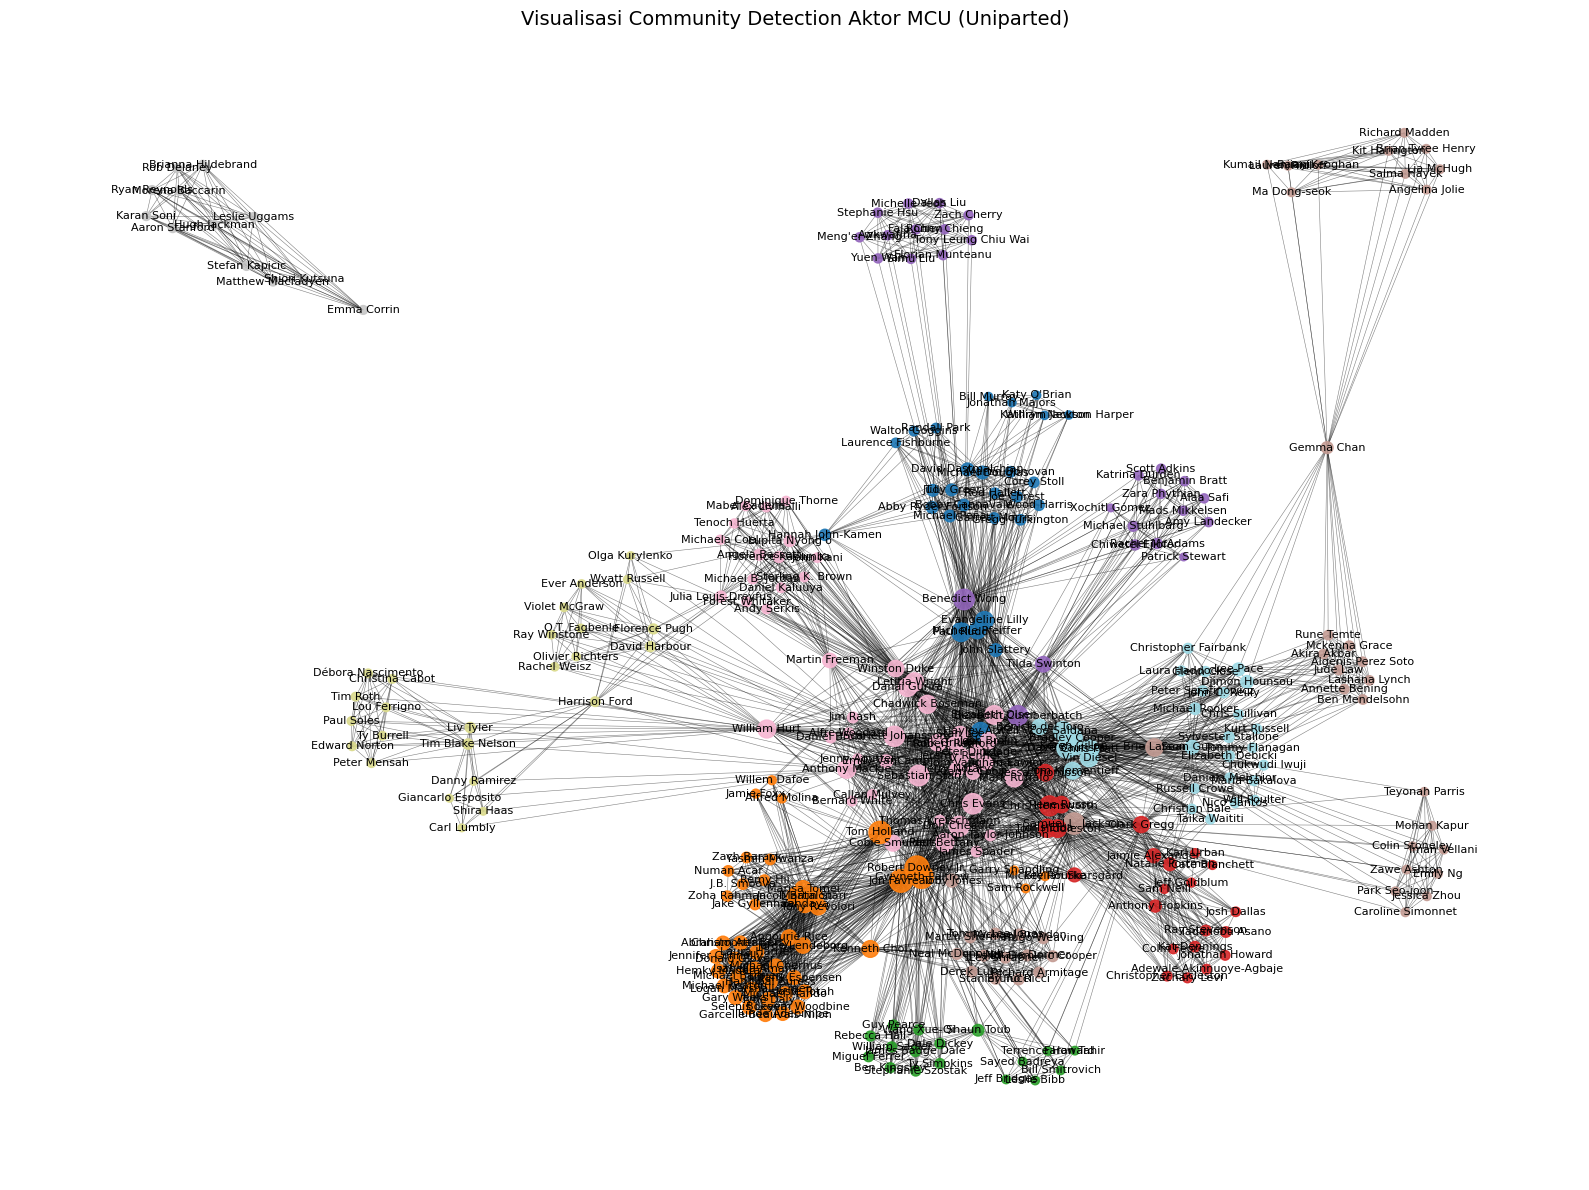

In [ ]:
# Hitung posisi layout dengan spring layout
pos = nx.spring_layout(G, k=0.4, iterations=100, seed=42)

# Mengatur ukuran node berdasarkan degree secara dinamis
min_size = 30
max_size = 300

degree_values = [G.degree(n) for n in G.nodes()]
max_degree = max(degree_values)
min_degree = min(degree_values)

# Fungsi untuk menghitung ukuran node
def scale_size(degree, min_degree, max_degree, min_size, max_size):
    if max_degree == min_degree:
        return min_size
    return min_size + (degree - min_degree) / (max_degree - min_degree) * (max_size - min_size)

# Terapkan fungsi ukuran
node_size = [scale_size(G.degree(n), min_degree, max_degree, min_size, max_size) for n in G.nodes()]

# Warna berdasarkan komunitas
colors = [partition.get(n, 0) for n in G.nodes()]

# Visualisasi jaringan
plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.tab20, node_size=node_size, alpha=0.9)

# Gambar edge
nx.draw_networkx_edges(G, pos, width=0.4, alpha=0.5)

# Label hanya untuk node penting
important_nodes = [n for n in G.nodes() if G.degree(n) > 3]
nx.draw_networkx_labels(G, pos, labels={n: n for n in important_nodes}, font_size=8)

plt.title("Visualisasi Community Detection Aktor MCU (Uniparted)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


## **2.2 Louvain Weighted**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
from collections import Counter

# 1. Bangun graf UNIPARTED berbobot
G = nx.Graph()

# Hitung frekuensi pasangan aktor → bobot edge
pair_freq = Counter(tuple(sorted((row['source'], row['target'])))
                    for _, row in df2.iterrows())

for (actor1, actor2), wt in pair_freq.items():
    G.add_edge(actor1, actor2, weight=wt)   # simpan bobot

# 2. Deteksi komunitas Louvain dengan bobot
partition = community_louvain.best_partition(G, weight='weight')

# 3. Info komunitas
for node, cid in partition.items():
    print(f"{node}  → komunitas {cid}")


Jon Favreau  → komunitas 1
Robert Downey Jr.  → komunitas 7
Terrence Howard  → komunitas 1
Gwyneth Paltrow  → komunitas 1
Jeff Bridges  → komunitas 1
Shaun Toub  → komunitas 2
Faran Tahir  → komunitas 1
Leslie Bibb  → komunitas 1
Sayed Badreya  → komunitas 1
Clark Gregg  → komunitas 3
Bill Smitrovich  → komunitas 1
Edward Norton  → komunitas 4
Liv Tyler  → komunitas 4
Tim Roth  → komunitas 4
William Hurt  → komunitas 7
Tim Blake Nelson  → komunitas 4
Ty Burrell  → komunitas 4
Christina Cabot  → komunitas 4
Peter Mensah  → komunitas 4
Lou Ferrigno  → komunitas 4
Paul Soles  → komunitas 4
Débora Nascimento  → komunitas 4
Don Cheadle  → komunitas 7
Scarlett Johansson  → komunitas 7
Sam Rockwell  → komunitas 7
Mickey Rourke  → komunitas 7
Samuel L. Jackson  → komunitas 7
John Slattery  → komunitas 6
Garry Shandling  → komunitas 7
Chris Hemsworth  → komunitas 3
Natalie Portman  → komunitas 3
Anthony Hopkins  → komunitas 3
Tom Hiddleston  → komunitas 3
Stellan Skarsgård  → komunitas 3
Colm F

### Evaluasi

In [ ]:
num_communities = max(partition.values()) + 1
print(f"Jumlah komunitas (weighted-Louvain): {num_communities}")

# Hitung modularity dari partisi
modularity2 = community_louvain.modularity(partition, G)
print(f"Modularity jaringan (Louvain Weighted - Uniparted): {modularity2:.4f}")

Jumlah komunitas (weighted-Louvain): 11
Modularity jaringan (Louvain Weighted - Uniparted): 0.5367


In [ ]:
# Hitung ukuran komunitas dari hasil partition
community_sizes2 = Counter(partition.values())

# Konversi ke DataFrame
df_komunitas = pd.DataFrame.from_dict(community_sizes2, orient='index', columns=['Jumlah Anggota'])
df_komunitas.index.name = 'ID Komunitas'
df_komunitas = df_komunitas.reset_index()

# Tambahkan kolom persentase (opsional)
total_anggota = df_komunitas['Jumlah Anggota'].sum()
df_komunitas['Persentase (%)'] = df_komunitas['Jumlah Anggota'] / total_anggota * 100

# Urutkan dari komunitas terbesar ke terkecil
df_komunitas = df_komunitas.sort_values(by='Jumlah Anggota', ascending=False)

# Tampilkan
df_komunitas

ID Komunitas  Jumlah Anggota  Persentase (%)
0              1              48       15.946844
1              7              46       15.282392
6              8              32       10.631229
7              9              31       10.299003
9              5              27        8.970100
5              6              27        8.970100
4              4              25        8.305648
3              3              23        7.641196
8             10              19        6.312292
10             0              12        3.986711
2              2              11        3.654485

### Visualisasi

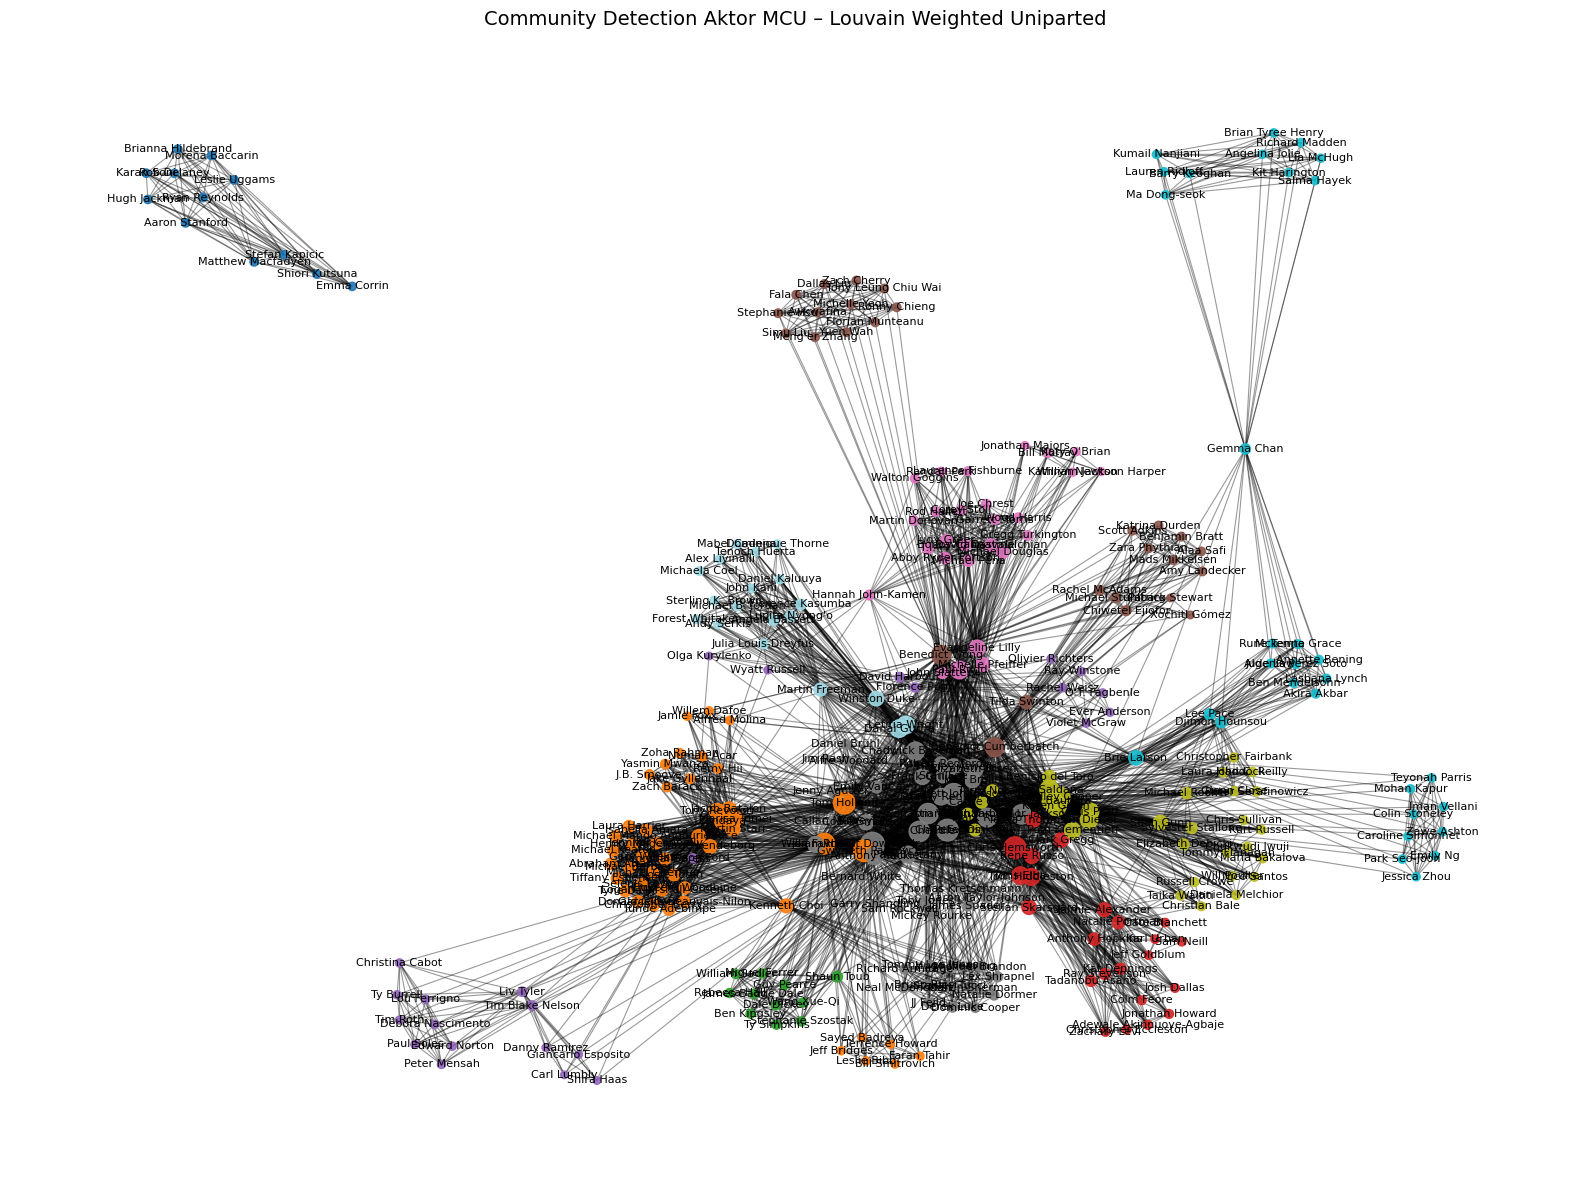

In [ ]:
# 4. Visualisasi
pos = nx.spring_layout(G, k=0.5, iterations=100, seed=42)

# ukuran node ∝ degree berbobot
deg_w = dict(G.degree(weight='weight'))
min_deg, max_deg = min(deg_w.values()), max(deg_w.values())
def scale(d):                                   # normalisasi ukuran
    if max_deg == min_deg:
        return 30
    return 30 + (d-min_deg)/(max_deg-min_deg) * (300-30)

node_size = [scale(deg_w[n]) for n in G.nodes()]
colors     = [partition[n]   for n in G.nodes()]

plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(G, pos,
                       node_color=colors, cmap=plt.cm.tab20,
                       node_size=node_size, alpha=0.9)
# tebal edge ∝ bobot (opsional, batasi supaya tidak terlalu tebal)
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=[0.2 + w*0.3 for w in weights], alpha=0.4)

# label hanya aktor "penting"
important = [n for n in G if deg_w[n] > 3]
nx.draw_networkx_labels(G, pos,
                        labels={n: n for n in important},
                        font_size=8)

plt.title("Community Detection Aktor MCU – Louvain Weighted Uniparted", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


## **2.3 Infomap**


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from infomap import Infomap

# Buat Graph
G = nx.Graph()

# Tambahkan edge dari df2
for idx, row in df2.iterrows():
    actor1 = row['source']
    actor2 = row['target']
    G.add_edge(actor1, actor2)

# Buat mapping dari nama ke ID numerik
node_to_id = {node: idx for idx, node in enumerate(G.nodes())}
id_to_node = {idx: node for node, idx in node_to_id.items()}

# Inisialisasi Infomap
infomap = Infomap()

# Tambahkan edge dalam bentuk ID numerik
for u, v in G.edges():
    infomap.add_link(node_to_id[u], node_to_id[v])

# Jalankan algoritma Infomap
infomap.run()

# Ambil hasil komunitas dan ubah kembali ke nama
partition = {id_to_node[node.node_id]: node.module_id for node in infomap.nodes}

# Tampilkan hasil komunitas
for node, community_id in partition.items():
    print(f"{node}  → komunitas {community_id}")

Robert Downey Jr.  → komunitas 1
Gwyneth Paltrow  → komunitas 1
Sebastian Stan  → komunitas 1
Benedict Wong  → komunitas 1
Chris Evans  → komunitas 1
Scarlett Johansson  → komunitas 1
Chris Hemsworth  → komunitas 1
Don Cheadle  → komunitas 1
Benedict Cumberbatch  → komunitas 1
Dave Bautista  → komunitas 1
Bradley Cooper  → komunitas 1
Karen Gillan  → komunitas 1
Zoe Saldaña  → komunitas 1
Elizabeth Olsen  → komunitas 1
Danai Gurira  → komunitas 1
Letitia Wright  → komunitas 1
Anthony Mackie  → komunitas 1
Chadwick Boseman  → komunitas 1
Paul Bettany  → komunitas 1
Mark Ruffalo  → komunitas 1
Idris Elba  → komunitas 1
William Hurt  → komunitas 1
Vin Diesel  → komunitas 1
Chris Pratt  → komunitas 1
Jeremy Renner  → komunitas 1
Pom Klementieff  → komunitas 1
Michelle Pfeiffer  → komunitas 1
Tessa Thompson  → komunitas 1
Frank Grillo  → komunitas 1
Cobie Smulders  → komunitas 1
Josh Brolin  → komunitas 1
Tilda Swinton  → komunitas 1
Robert Redford  → komunitas 1
Benicio del Toro  → komunit

### Evaluasi

In [ ]:
# Hitung jumlah komunitas
num_communities = len(set(partition.values()))
print(f"Jumlah komunitas untuk uniparted (Infomap): {num_communities}")

# Hitung modularity dari partisi
modularity3 = community_louvain.modularity(partition, G)
print(f"Modularity jaringan (Louvain - Uniparted): {modularity3:.4f}")

Jumlah komunitas untuk uniparted (Infomap): 15
Modularity jaringan (Louvain - Uniparted): 0.5240


In [ ]:
# Hitung ukuran komunitas dari hasil partition
community_sizes3 = Counter(partition.values())

# Konversi ke DataFrame
df_komunitas = pd.DataFrame.from_dict(community_sizes3, orient='index', columns=['Jumlah Anggota'])
df_komunitas.index.name = 'ID Komunitas'
df_komunitas = df_komunitas.reset_index()

# Tambahkan kolom persentase (opsional)
total_anggota = df_komunitas['Jumlah Anggota'].sum()
df_komunitas['Persentase (%)'] = df_komunitas['Jumlah Anggota'] / total_anggota * 100

# Urutkan dari komunitas terbesar ke terkecil
df_komunitas = df_komunitas.sort_values(by='Jumlah Anggota', ascending=False)

# Tampilkan
df_komunitas

ID Komunitas  Jumlah Anggota  Persentase (%)
0              1              81       26.910299
1              2              41       13.621262
2              3              27        8.970100
3              4              19        6.312292
5              6              17        5.647841
4              5              16        5.315615
8              9              15        4.983389
6              7              14        4.651163
9             10              12        3.986711
10            11              12        3.986711
7              8              11        3.654485
11            12              11        3.654485
12            13              10        3.322259
13            14               9        2.990033
14            15               6        1.993355

### Visualisasi

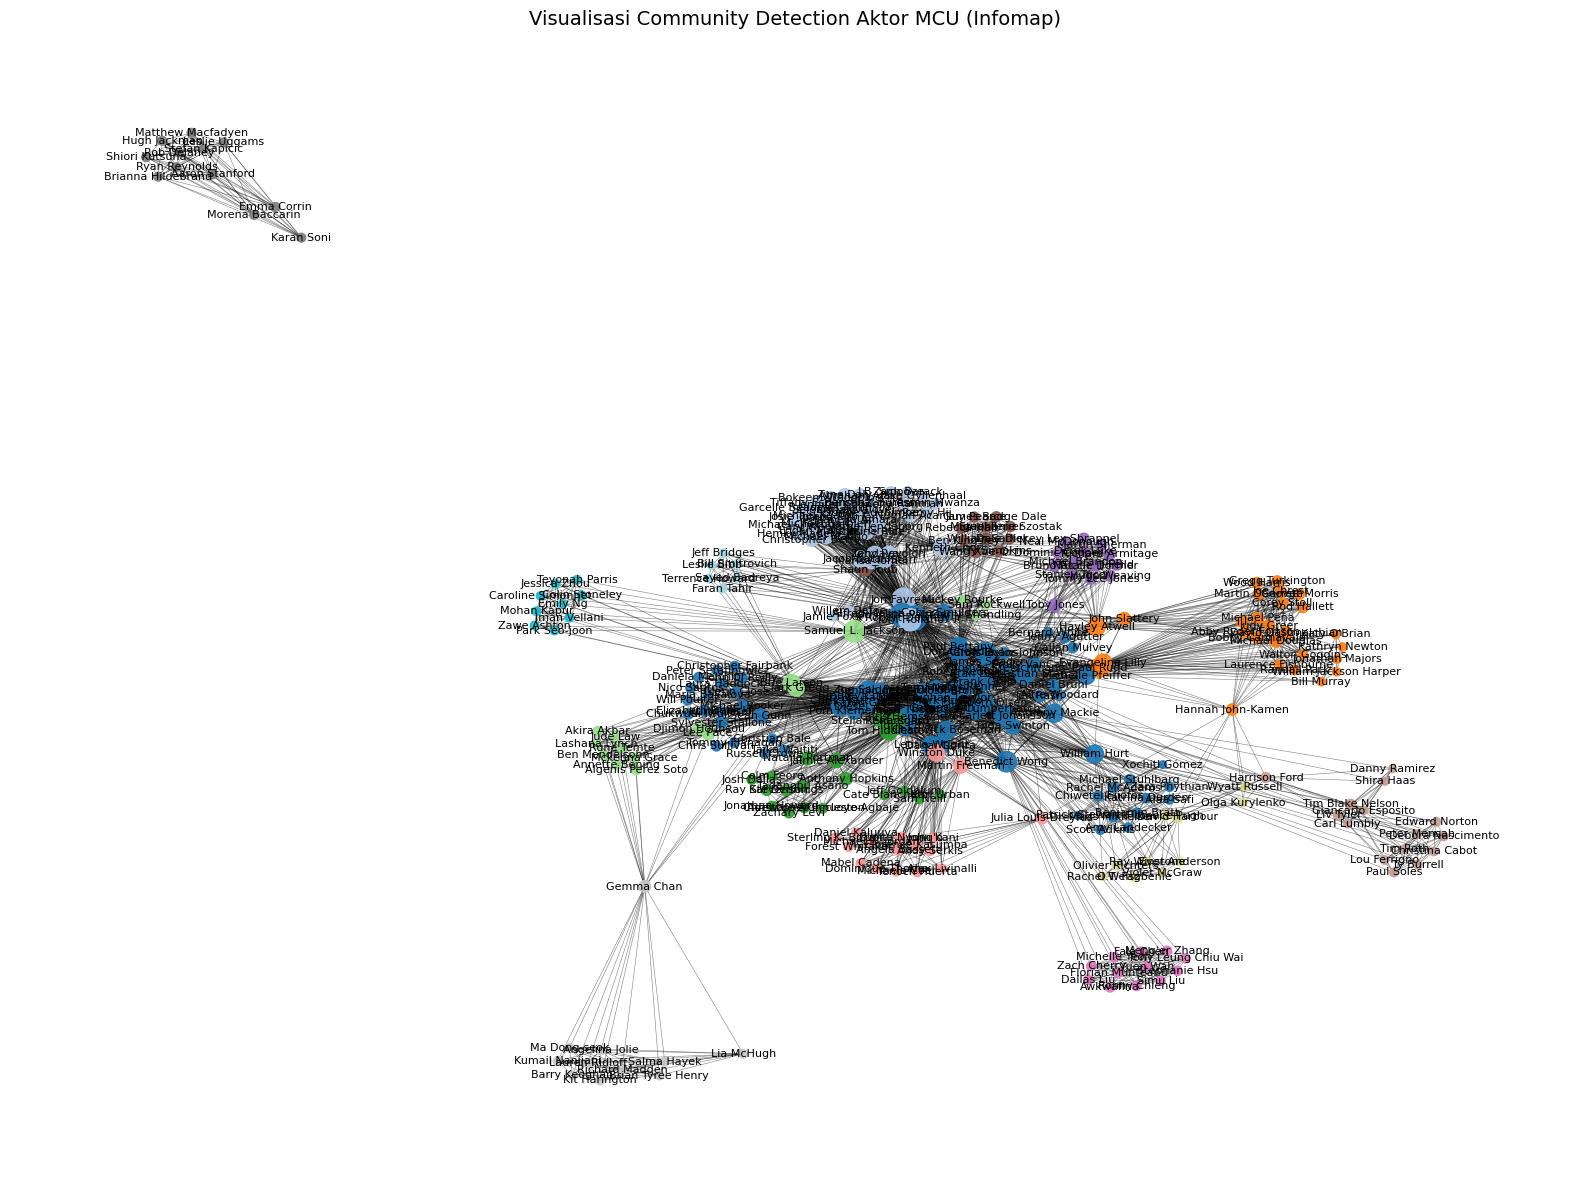

In [ ]:
# Layout posisi untuk visualisasi
pos = nx.spring_layout(G, k=0.3, iterations=100)

# Ukuran node dinamis
min_size = 30
max_size = 300
degree_values = [G.degree(n) for n in G.nodes()]
max_degree = max(degree_values)
min_degree = min(degree_values)

def scale_size(degree, min_degree, max_degree, min_size, max_size):
    if max_degree == min_degree:
        return min_size
    return min_size + (degree - min_degree) / (max_degree - min_degree) * (max_size - min_size)

node_size = [scale_size(G.degree(n), min_degree, max_degree, min_size, max_size) for n in G.nodes()]
colors = [partition.get(n, 0) for n in G.nodes()]

# Visualisasi
plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.tab20, node_size=node_size, alpha=0.9)
nx.draw_networkx_edges(G, pos, width=0.4, alpha=0.5)

important_nodes = [n for n in G.nodes() if G.degree(n) > 3]
nx.draw_networkx_labels(G, pos, labels={n: n for n in important_nodes}, font_size=8)

plt.title("Visualisasi Community Detection Aktor MCU (Infomap)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


## **2.4 Infomap Weighted**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from infomap import Infomap
from collections import Counter


# 1. Bangun graf UNIPARTED berbobot

G = nx.Graph()

# Hitung frekuensi pasangan aktor → bobot edge
pair_freq = Counter(tuple(sorted((row['source'], row['target'])))
                    for _, row in df2.iterrows())

for (actor1, actor2), w in pair_freq.items():
    G.add_edge(actor1, actor2, weight=w)


# 2. Mapping nama → ID numerik (Infomap perlu integer)

node_to_id = {node: idx for idx, node in enumerate(G.nodes())}
id_to_node = {idx: node for node, idx in node_to_id.items()}


# 3. Inisialisasi & isi graf Infomap berbobot

infomap = Infomap()

for u, v, data in G.edges(data=True):
    infomap.add_link(node_to_id[u], node_to_id[v], data['weight'])

infomap.run()


# 4. Hasil komunitas → nama asli

partition = {id_to_node[n.node_id]: n.module_id for n in infomap.nodes}

# tampilkan komunitas
for node, cid in partition.items():
    print(f"{node} → komunitas {cid}")



Robert Downey Jr. → komunitas 1
Scarlett Johansson → komunitas 1
Gwyneth Paltrow → komunitas 1
Chris Evans → komunitas 1
Don Cheadle → komunitas 1
Sebastian Stan → komunitas 1
Samuel L. Jackson → komunitas 1
Elizabeth Olsen → komunitas 1
Mark Ruffalo → komunitas 1
Chadwick Boseman → komunitas 1
Anthony Mackie → komunitas 1
Paul Bettany → komunitas 1
Jeremy Renner → komunitas 1
William Hurt → komunitas 1
Hayley Atwell → komunitas 1
Frank Grillo → komunitas 1
Josh Brolin → komunitas 1
Cobie Smulders → komunitas 1
Robert Redford → komunitas 1
Stan Lee → komunitas 1
Carrie Coon → komunitas 1
Terry Notary → komunitas 1
Tom Vaughan-Lawlor → komunitas 1
Peter Dinklage → komunitas 1
Emily VanCamp → komunitas 1
Daniel Brühl → komunitas 1
Alfre Woodard → komunitas 1
Jim Rash → komunitas 1
Aaron Taylor-Johnson → komunitas 1
James Spader → komunitas 1
Thomas Kretschmann → komunitas 1
Bernard White → komunitas 1
Jenny Agutter → komunitas 1
Callan Mulvey → komunitas 1
Mickey Rourke → komunitas 1
Sam

### Evaluasi

In [ ]:
num_communities = len(set(partition.values()))
print(f"Jumlah komunitas (Infomap weighted): {num_communities}")

# Hitung modularity dari partisi
modularity4 = community_louvain.modularity(partition, G)
print(f"Modularity jaringan (Louvain - Uniparted): {modularity4:.4f}")

Jumlah komunitas (Infomap weighted): 16
Modularity jaringan (Louvain - Uniparted): 0.5293


In [ ]:
# Hitung ukuran komunitas dari hasil partition
community_sizes4 = Counter(partition.values())

# Konversi ke DataFrame
df_komunitas = pd.DataFrame.from_dict(community_sizes4, orient='index', columns=['Jumlah Anggota'])
df_komunitas.index.name = 'ID Komunitas'
df_komunitas = df_komunitas.reset_index()

# Tambahkan kolom persentase (opsional)
total_anggota = df_komunitas['Jumlah Anggota'].sum()
df_komunitas['Persentase (%)'] = df_komunitas['Jumlah Anggota'] / total_anggota * 100

# Urutkan dari komunitas terbesar ke terkecil
df_komunitas = df_komunitas.sort_values(by='Jumlah Anggota', ascending=False)

# Tampilkan
df_komunitas

ID Komunitas  Jumlah Anggota  Persentase (%)
1              2              47       15.614618
0              1              37       12.292359
2              3              28        9.302326
4              5              27        8.970100
3              4              22        7.308970
5              6              19        6.312292
6              7              15        4.983389
10            11              15        4.983389
8              9              14        4.651163
7              8              12        3.986711
11            12              12        3.986711
12            13              12        3.986711
9             10              11        3.654485
13            14              11        3.654485
14            15              10        3.322259
15            16               9        2.990033

### Visualisasi

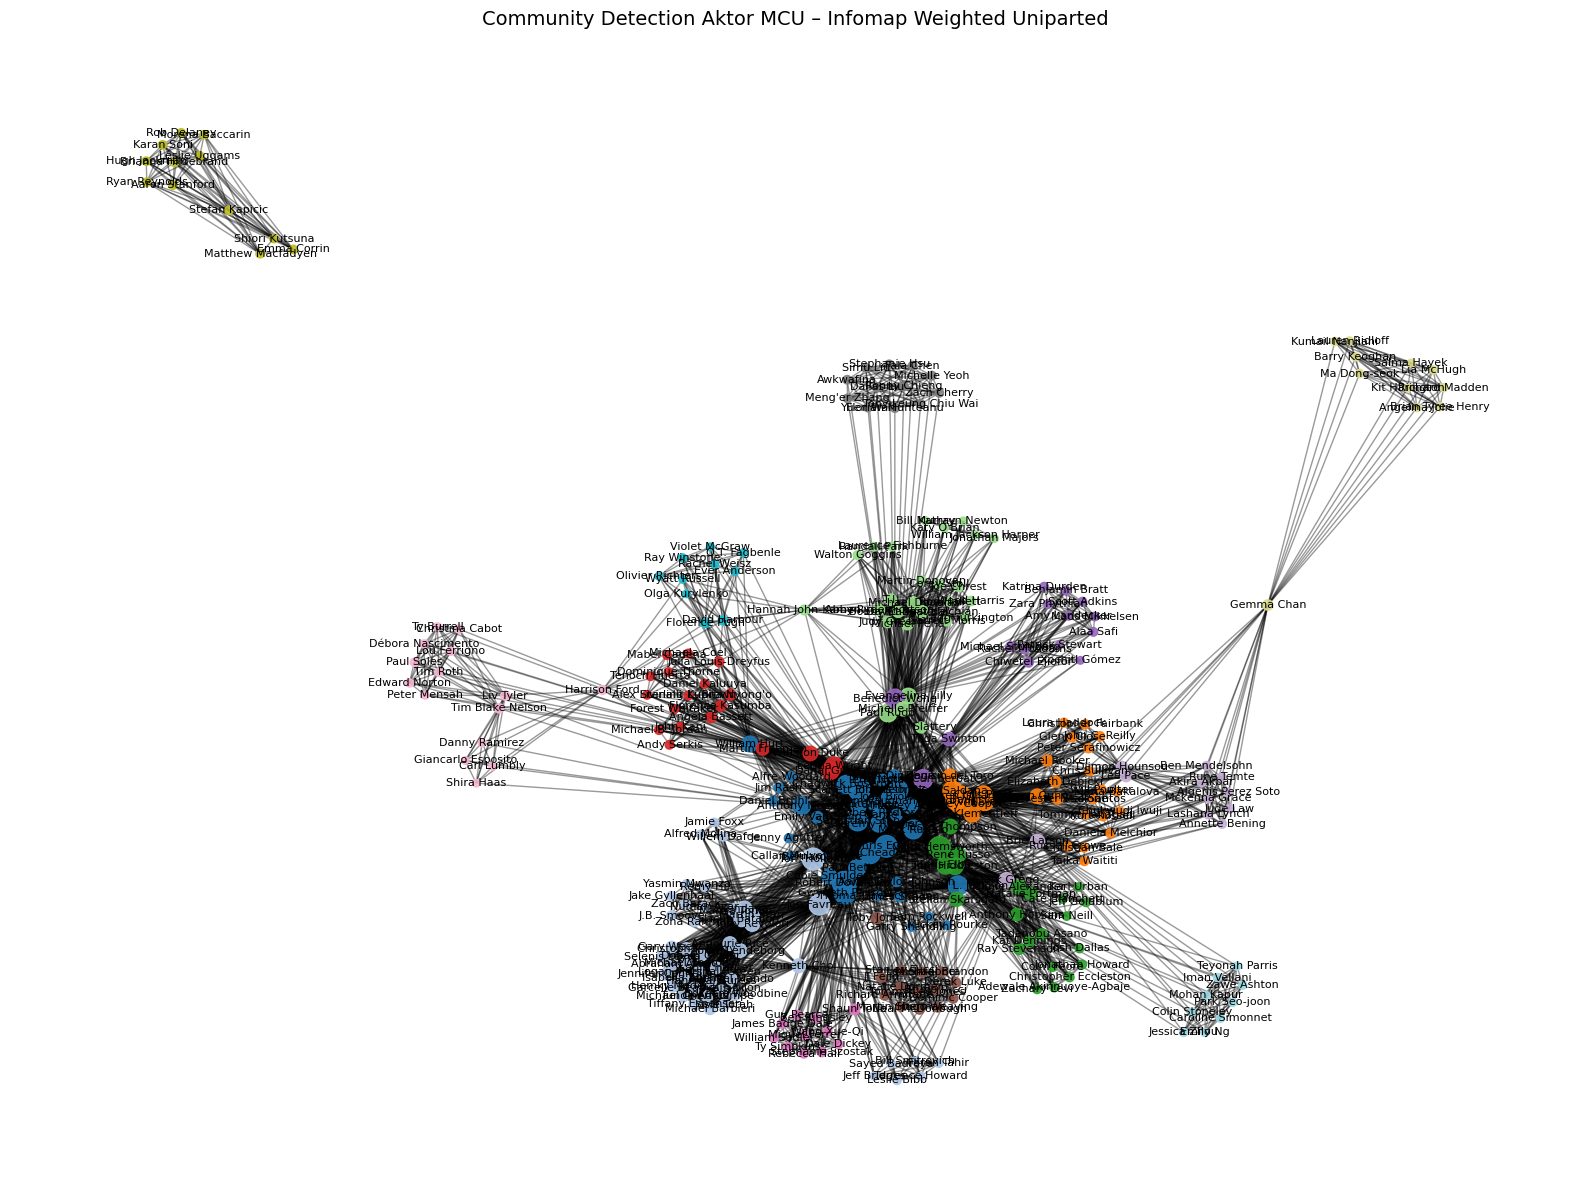

In [ ]:

# 5. Visualisasi

pos = nx.spring_layout(G, k=0.4, iterations=100, seed=42)

# ukuran node ∝ degree berbobot
deg_w = dict(G.degree(weight='weight'))
mn, mx = min(deg_w.values()), max(deg_w.values())
scale = lambda d: 30 if mx == mn else 30 + (d-mn)/(mx-mn)*(300-30)
node_size = [scale(deg_w[n]) for n in G]
colors     = [partition[n] for n in G]

plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.tab20,
                       node_size=node_size, alpha=0.9)

edge_w = [0.2 + 0.4*G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=edge_w, alpha=0.4)

important = [n for n in G if deg_w[n] > 3]
nx.draw_networkx_labels(G, pos,
                        labels={n: n for n in important},
                        font_size=8)

plt.title("Community Detection Aktor MCU – Infomap Weighted Uniparted", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


# **3. Biparted**

## **3.1 Louvain**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from community import community_louvain

# Membuat Graph Bipartit (Film-Aktor)
B = nx.Graph()

# Tambahkan node dan edge
for idx, row in df.iterrows():
    film = row['source']
    actor = row['target']
    B.add_node(film, bipartite=0)  # Film
    B.add_node(actor, bipartite=1) # Aktor
    B.add_edge(film, actor)

# Deteksi komunitas dengan Louvain pada Graph Bipartit
partition = community_louvain.best_partition(B)

# Tampilkan hasil komunitas
for node, community_id in partition.items():
    print(f"{node}  → komunitas {community_id}")

Iron Man  → komunitas 0
Jon Favreau  → komunitas 0
Robert Downey Jr.  → komunitas 0
Terrence Howard  → komunitas 0
Gwyneth Paltrow  → komunitas 0
Jeff Bridges  → komunitas 0
Shaun Toub  → komunitas 0
Faran Tahir  → komunitas 0
Leslie Bibb  → komunitas 0
Sayed Badreya  → komunitas 0
Clark Gregg  → komunitas 1
Bill Smitrovich  → komunitas 0
The Incredible Hulk  → komunitas 3
Edward Norton  → komunitas 3
Liv Tyler  → komunitas 3
Tim Roth  → komunitas 3
William Hurt  → komunitas 3
Tim Blake Nelson  → komunitas 3
Ty Burrell  → komunitas 3
Christina Cabot  → komunitas 3
Peter Mensah  → komunitas 3
Lou Ferrigno  → komunitas 3
Paul Soles  → komunitas 3
Débora Nascimento  → komunitas 3
Iron Man 2  → komunitas 0
Don Cheadle  → komunitas 1
Scarlett Johansson  → komunitas 4
Sam Rockwell  → komunitas 0
Mickey Rourke  → komunitas 0
Samuel L. Jackson  → komunitas 5
John Slattery  → komunitas 6
Garry Shandling  → komunitas 0
Thor  → komunitas 1
Chris Hemsworth  → komunitas 1
Natalie Portman  → komunit

### Evaluasi

In [ ]:
# Hitung jumlah komunitas yang terbentuk
num_communities = max(partition.values()) + 1
print(f"Jumlah komunitas untuk Biparted: {num_communities}")

# Hitung modularity dari partisi
modularity5 = community_louvain.modularity(partition, B)
print(f"Modularity jaringan (Louvain - Uniparted): {modularity5:.4f}")

Jumlah komunitas untuk Biparted: 13
Modularity jaringan (Louvain - Uniparted): 0.6967


In [ ]:
# Hitung ukuran komunitas dari hasil partition
community_sizes5 = Counter(partition.values())

# Konversi ke DataFrame
df_komunitas = pd.DataFrame.from_dict(community_sizes5, orient='index', columns=['Jumlah Anggota'])
df_komunitas.index.name = 'ID Komunitas'
df_komunitas = df_komunitas.reset_index()

# Tambahkan kolom persentase (opsional)
total_anggota = df_komunitas['Jumlah Anggota'].sum()
df_komunitas['Persentase (%)'] = df_komunitas['Jumlah Anggota'] / total_anggota * 100

# Urutkan dari komunitas terbesar ke terkecil
df_komunitas = df_komunitas.sort_values(by='Jumlah Anggota', ascending=False)

# Tampilkan
df_komunitas

ID Komunitas  Jumlah Anggota  Persentase (%)
10            11              41       12.166172
7              8              38       11.275964
1              1              35       10.385757
2              3              33        9.792285
8              9              31        9.198813
5              6              30        8.902077
0              0              27        8.011869
4              5              23        6.824926
9             10              21        6.231454
3              4              17        5.044510
6              7              16        4.747774
12             2              13        3.857567
11            12              12        3.560831

### Visualisasi

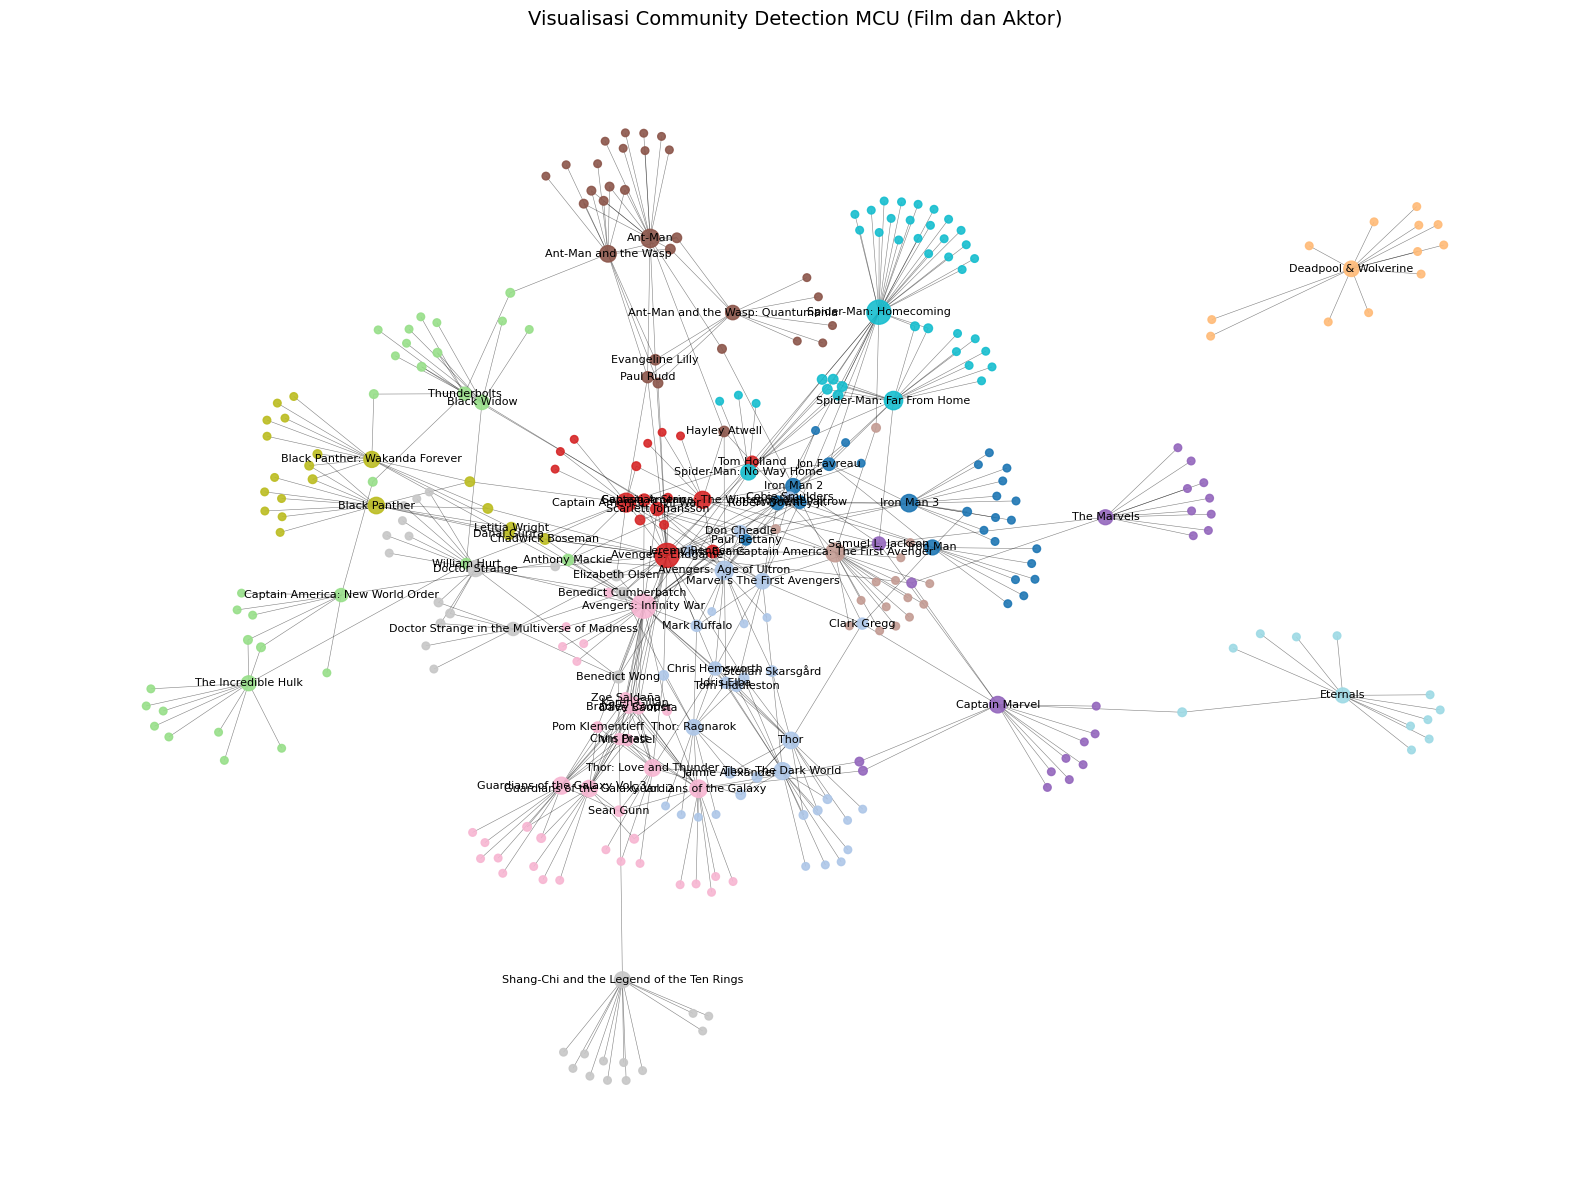

In [ ]:
# Hitung posisi layout dengan spring layout
pos = nx.spring_layout(B, k=0.5, iterations=300)

# Mengatur ukuran node berdasarkan degree secara dinamis
min_size = 30   # Ukuran minimum untuk node dengan degree 1
max_size = 300  # Ukuran maksimum untuk node dengan degree tertinggi

degree_values = [B.degree(n) for n in B.nodes()]
max_degree = max(degree_values)
min_degree = min(degree_values)

# Fungsi untuk menghitung ukuran node
def scale_size(degree, min_degree, max_degree, min_size, max_size):
    if max_degree == min_degree:
        return min_size  # Jika semua degree sama
    return min_size + (degree - min_degree) / (max_degree - min_degree) * (max_size - min_size)

# Terapkan fungsi ukuran
node_size = [scale_size(B.degree(n), min_degree, max_degree, min_size, max_size) for n in B.nodes()]

# Warna berdasarkan komunitas
colors = [partition.get(n, 0) for n in B.nodes()]

# Visualisasi jaringan
plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(B, pos,
                       node_color=colors,
                       cmap=plt.cm.tab20,
                       node_size=node_size,
                       alpha=0.9)

# Gambar edge
nx.draw_networkx_edges(B, pos, width=0.4, alpha=0.5)

# Label hanya untuk node penting
important_nodes = [n for n in B.nodes() if B.degree(n) > 3]
nx.draw_networkx_labels(B, pos,
                        labels={n: n for n in important_nodes},
                        font_size=8)

plt.title("Visualisasi Community Detection MCU (Film dan Aktor)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


## **3.2 Louvain Weighted**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from community import community_louvain
from networkx.algorithms import bipartite


# 1. Bangun GRAF BIPARTIT berbobot

B = nx.Graph()

# hitung frekuensi (film, aktor) → bobot
pair_freq = Counter((row['source'], row['target']) for _, row in df.iterrows())

for (film, actor), w in pair_freq.items():
    B.add_node(film,  bipartite=0)   # film
    B.add_node(actor, bipartite=1)   # aktor
    B.add_edge(film, actor, weight=w)


# 2. Deteksi komunitas Louvain dengan bobot

partition = community_louvain.best_partition(B, weight='weight')

# tampilkan komunitas
for node, cid in partition.items():
    print(f"{node} → komunitas {cid}")



Iron Man → komunitas 0
Jon Favreau → komunitas 0
Robert Downey Jr. → komunitas 0
Terrence Howard → komunitas 0
Gwyneth Paltrow → komunitas 0
Jeff Bridges → komunitas 0
Shaun Toub → komunitas 0
Faran Tahir → komunitas 0
Leslie Bibb → komunitas 0
Sayed Badreya → komunitas 0
Clark Gregg → komunitas 0
Bill Smitrovich → komunitas 0
The Incredible Hulk → komunitas 1
Edward Norton → komunitas 1
Liv Tyler → komunitas 1
Tim Roth → komunitas 1
William Hurt → komunitas 1
Tim Blake Nelson → komunitas 1
Ty Burrell → komunitas 1
Christina Cabot → komunitas 1
Peter Mensah → komunitas 1
Lou Ferrigno → komunitas 1
Paul Soles → komunitas 1
Débora Nascimento → komunitas 1
Iron Man 2 → komunitas 0
Don Cheadle → komunitas 0
Scarlett Johansson → komunitas 7
Sam Rockwell → komunitas 0
Mickey Rourke → komunitas 0
Samuel L. Jackson → komunitas 3
John Slattery → komunitas 4
Garry Shandling → komunitas 0
Thor → komunitas 5
Chris Hemsworth → komunitas 6
Natalie Portman → komunitas 5
Anthony Hopkins → komunitas 5


### Evaluasi

In [ ]:
num_communities = len(set(partition.values()))
print(f"Jumlah komunitas (Louvain weighted biparted): {num_communities}")

# Hitung modularity dari partisi
modularity6 = community_louvain.modularity(partition, B)
print(f"Modularity jaringan (Louvain - Uniparted): {modularity6:.4f}")

Jumlah komunitas (Louvain weighted biparted): 14
Modularity jaringan (Louvain - Uniparted): 0.6921


In [ ]:
# Hitung ukuran komunitas dari hasil partition
community_sizes6 = Counter(partition.values())

# Konversi ke DataFrame
df_komunitas = pd.DataFrame.from_dict(community_sizes6, orient='index', columns=['Jumlah Anggota'])
df_komunitas.index.name = 'ID Komunitas'
df_komunitas = df_komunitas.reset_index()

# Tambahkan kolom persentase (opsional)
total_anggota = df_komunitas['Jumlah Anggota'].sum()
df_komunitas['Persentase (%)'] = df_komunitas['Jumlah Anggota'] / total_anggota * 100

# Urutkan dari komunitas terbesar ke terkecil
df_komunitas = df_komunitas.sort_values(by='Jumlah Anggota', ascending=False)

# Tampilkan
df_komunitas

ID Komunitas  Jumlah Anggota  Persentase (%)
9             10              42       12.462908
2              7              41       12.166172
6              6              39       11.572700
4              4              29        8.605341
0              0              28        8.308605
5              5              24        7.121662
3              3              23        6.824926
10            11              20        5.934718
1              1              19        5.637982
8              9              19        5.637982
7              8              15        4.451039
12            13              13        3.857567
13             2              13        3.857567
11            12              12        3.560831

### Visualisasi

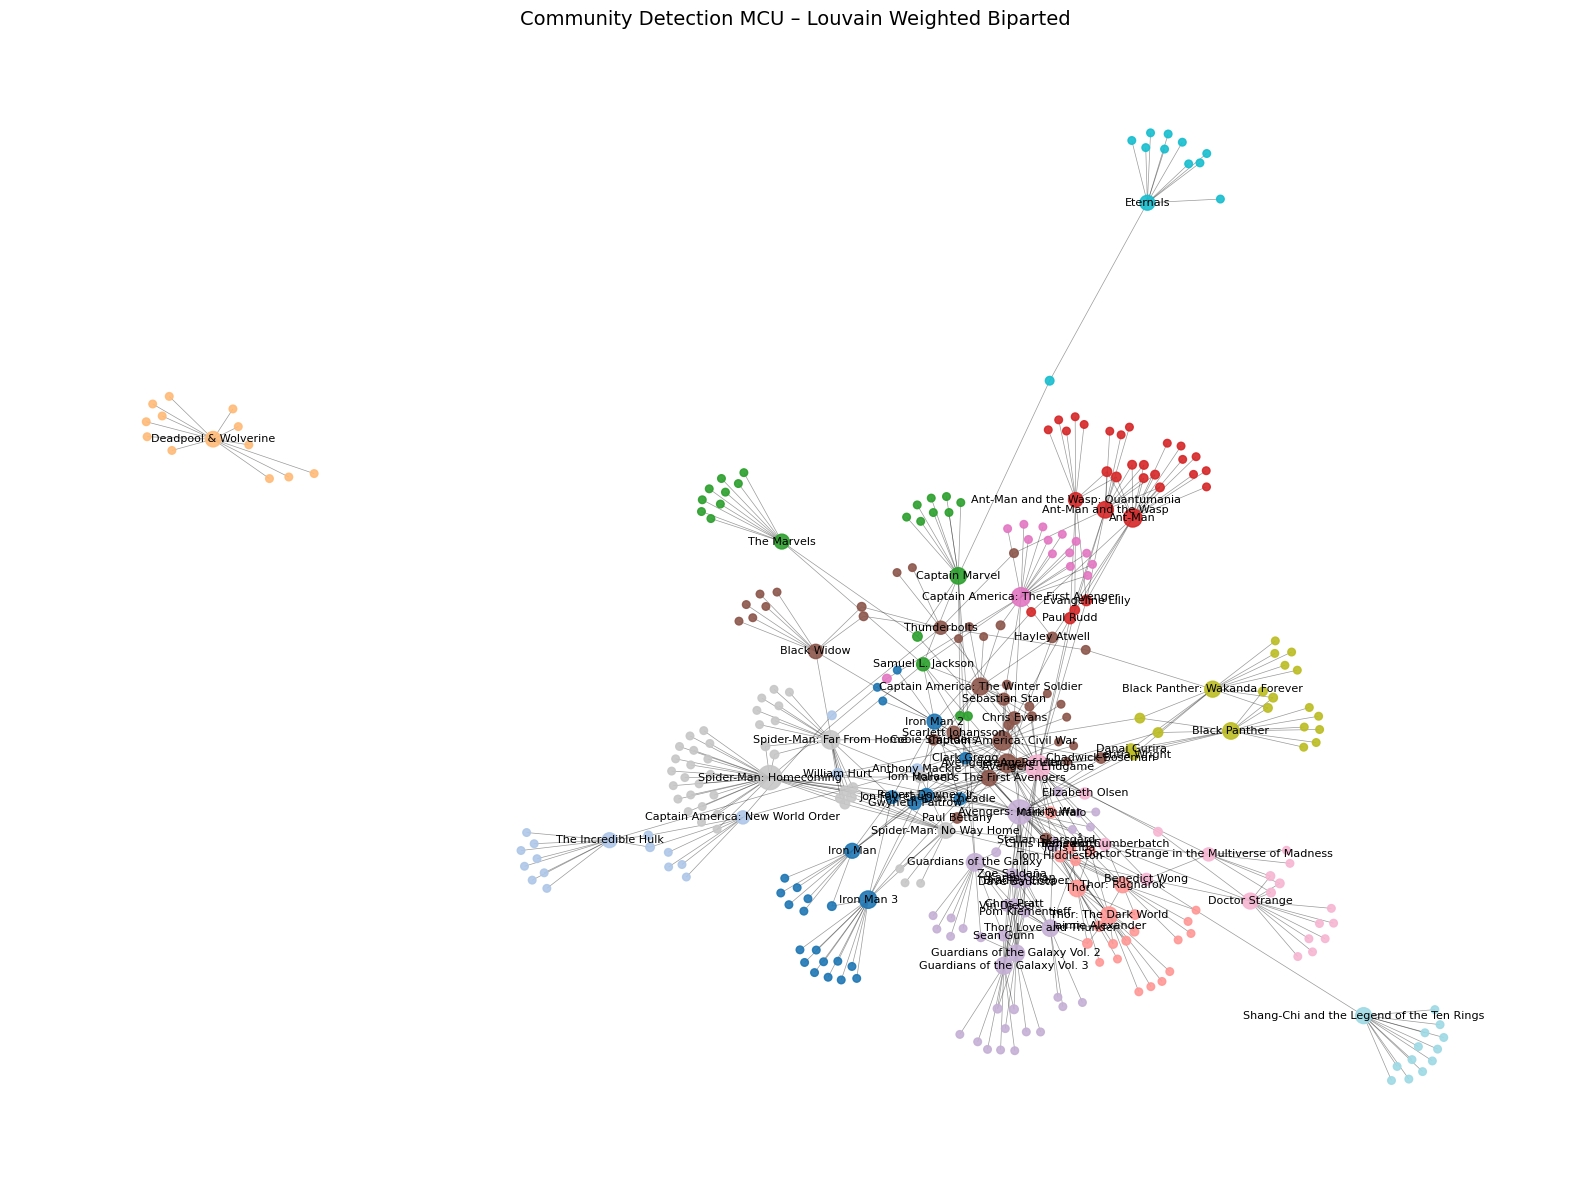

In [ ]:

# 3. Visualisasi

pos = nx.spring_layout(B, k=0.5, iterations=400, seed=42)

# ukuran node: degree berbobot
deg_w = dict(B.degree(weight='weight'))
mn, mx = min(deg_w.values()), max(deg_w.values())
scale = lambda d: 30 if mx == mn else 30 + (d-mn)/(mx-mn)*(300-30)
node_size = [scale(deg_w[n]) for n in B]
colors     = [partition[n] for n in B]

plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(B, pos,
                       node_color=colors, cmap=plt.cm.tab20,
                       node_size=node_size, alpha=0.9)

edge_w = [0.2 + 0.3*B[u][v]['weight'] for u, v in B.edges()]
nx.draw_networkx_edges(B, pos, width=edge_w, alpha=0.4)

important = [n for n in B if deg_w[n] > 3]
nx.draw_networkx_labels(B, pos,
                        labels={n: n for n in important},
                        font_size=8)

plt.title("Community Detection MCU – Louvain Weighted Biparted", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


## **3.3 Infomap**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from infomap import Infomap

# Membuat Graph Bipartit (Film - Aktor)
B = nx.Graph()

# Tambahkan node dan edge
for idx, row in df.iterrows():
    film = row['source']
    actor = row['target']
    B.add_node(film, bipartite=0)   # Film
    B.add_node(actor, bipartite=1)  # Aktor
    B.add_edge(film, actor)

# Buat mapping ke ID numerik karena Infomap hanya terima integer
node_to_id = {node: idx for idx, node in enumerate(B.nodes())}
id_to_node = {idx: node for node, idx in node_to_id.items()}

# Inisialisasi Infomap
infomap = Infomap()

# Tambahkan edge dalam format ID numerik
for u, v in B.edges():
    infomap.add_link(node_to_id[u], node_to_id[v])

# Jalankan algoritma Infomap
infomap.run()

# Ambil hasil komunitas dan konversi ke nama asli
partition = {id_to_node[node.node_id]: node.module_id for node in infomap.nodes}

# Tampilkan hasil komunitas
for node, community_id in partition.items():
    print(f"{node}  → komunitas {community_id}")

Avengers: Endgame  → komunitas 1
Avengers: Infinity War  → komunitas 1
Captain America: Civil War  → komunitas 1
Avengers: Age of Ultron  → komunitas 1
Captain America: The Winter Soldier  → komunitas 1
Marvel’s The First Avengers  → komunitas 1
Robert Downey Jr.  → komunitas 1
Scarlett Johansson  → komunitas 1
Samuel L. Jackson  → komunitas 1
Chris Hemsworth  → komunitas 1
Gwyneth Paltrow  → komunitas 1
Chris Evans  → komunitas 1
Don Cheadle  → komunitas 1
Sebastian Stan  → komunitas 1
Mark Ruffalo  → komunitas 1
Anthony Mackie  → komunitas 1
Elizabeth Olsen  → komunitas 1
William Hurt  → komunitas 1
Chadwick Boseman  → komunitas 1
Hayley Atwell  → komunitas 1
Paul Bettany  → komunitas 1
Jeremy Renner  → komunitas 1
Cobie Smulders  → komunitas 1
Frank Grillo  → komunitas 1
Emily VanCamp  → komunitas 1
Robert Redford  → komunitas 1
Stan Lee  → komunitas 1
Josh Brolin  → komunitas 1
Callan Mulvey  → komunitas 1
Bernard White  → komunitas 1
Carrie Coon  → komunitas 1
Terry Notary  → komu

### Evaluasi

In [ ]:
# Hitung jumlah komunitas
num_communities = len(set(partition.values()))
print(f"Jumlah komunitas untuk Biparted (Infomap): {num_communities}")

# Hitung modularity dari partisi
modularity7 = community_louvain.modularity(partition, B)
print(f"Modularity jaringan (Louvain - Uniparted): {modularity7:.4f}")

Jumlah komunitas untuk Biparted (Infomap): 18
Modularity jaringan (Louvain - Uniparted): 0.7092


In [ ]:
# Hitung ukuran komunitas dari hasil partition
community_sizes7 = Counter(partition.values())

# Konversi ke DataFrame
df_komunitas = pd.DataFrame.from_dict(community_sizes7, orient='index', columns=['Jumlah Anggota'])
df_komunitas.index.name = 'ID Komunitas'
df_komunitas = df_komunitas.reset_index()

# Tambahkan kolom persentase (opsional)
total_anggota = df_komunitas['Jumlah Anggota'].sum()
df_komunitas['Persentase (%)'] = df_komunitas['Jumlah Anggota'] / total_anggota * 100

# Urutkan dari komunitas terbesar ke terkecil
df_komunitas = df_komunitas.sort_values(by='Jumlah Anggota', ascending=False)

# Tampilkan
df_komunitas

ID Komunitas  Jumlah Anggota  Persentase (%)
1              2              43       12.759644
0              1              41       12.166172
2              3              32        9.495549
4              5              28        8.308605
3              4              24        7.121662
5              6              20        5.934718
6              7              17        5.044510
7              8              17        5.044510
8              9              16        4.747774
9             10              14        4.154303
13            14              13        3.857567
12            13              13        3.857567
10            11              12        3.560831
14            15              12        3.560831
11            12              11        3.264095
16            17              10        2.967359
17            18               8        2.373887
15            16               6        1.780415

### Visualisasi

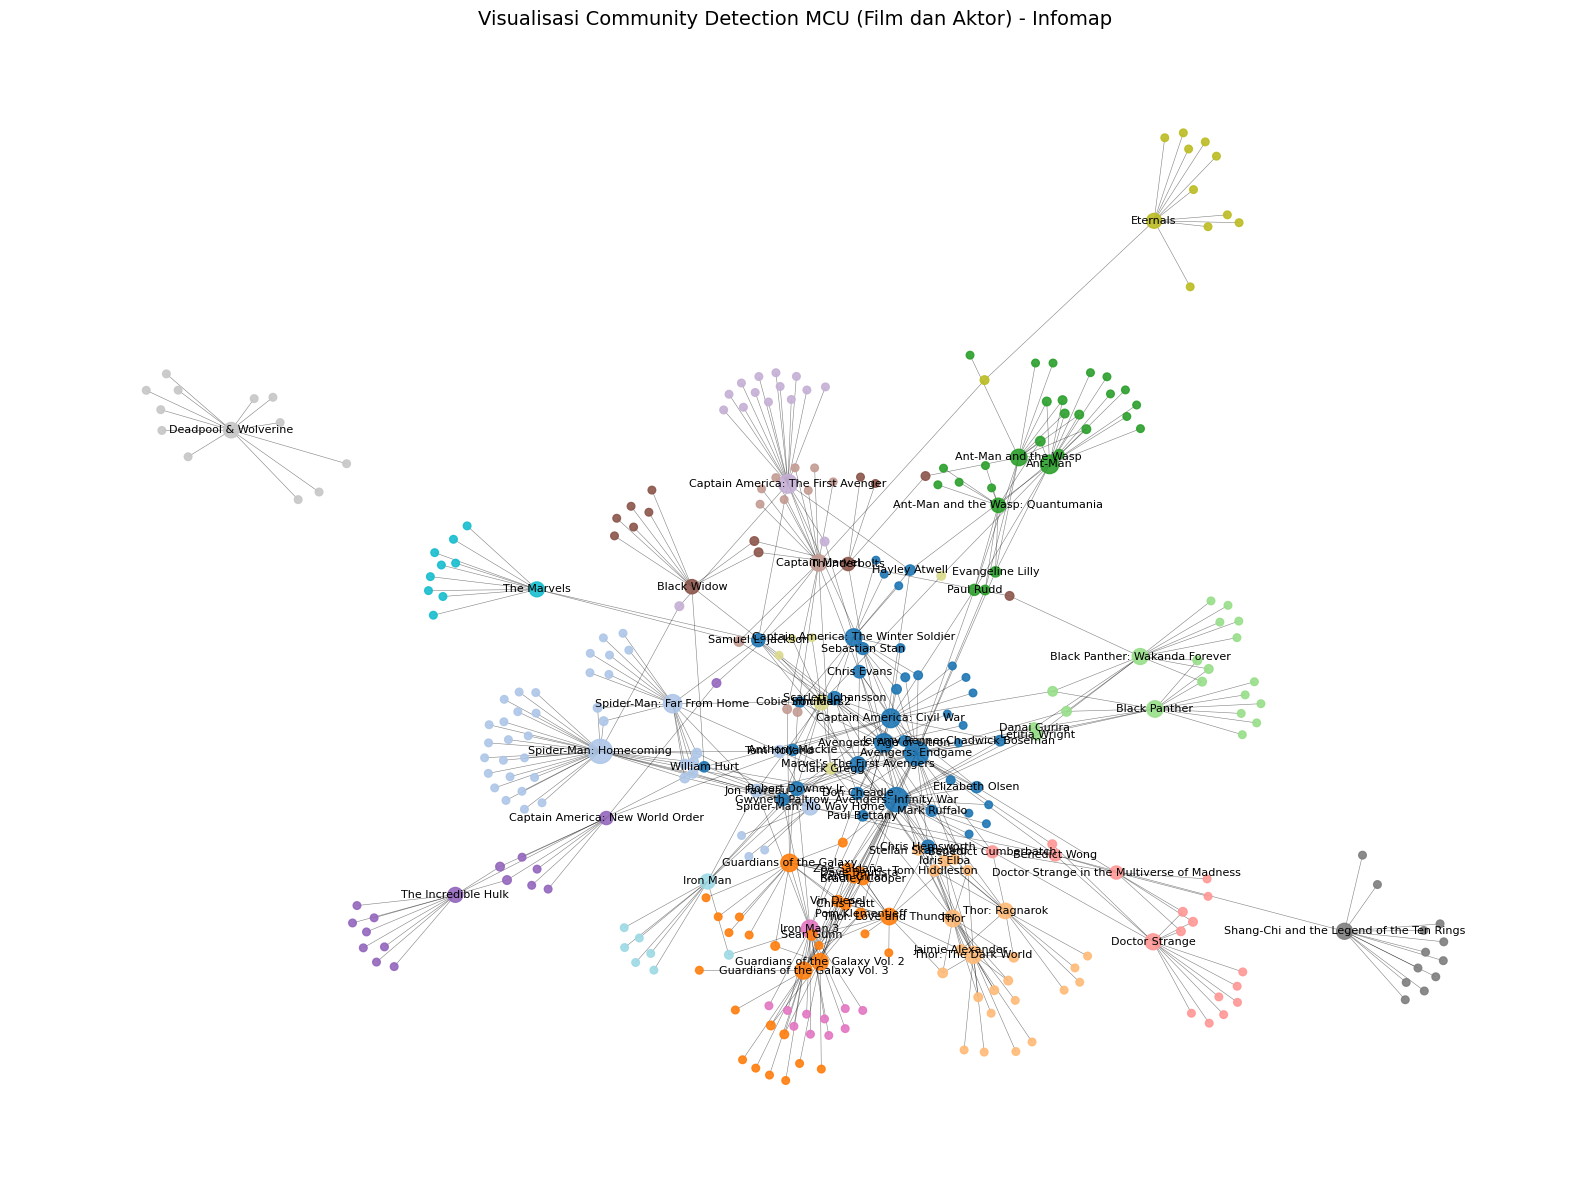

In [ ]:
# Hitung layout posisi untuk visualisasi
pos = nx.spring_layout(B, k=0.5, iterations=300, seed=42)

# Ukuran node berdasarkan degree
min_size = 30
max_size = 300
degree_values = [B.degree(n) for n in B.nodes()]
max_degree = max(degree_values)
min_degree = min(degree_values)

def scale_size(degree, min_degree, max_degree, min_size, max_size):
    if max_degree == min_degree:
        return min_size
    return min_size + (degree - min_degree) / (max_degree - min_degree) * (max_size - min_size)

node_size = [scale_size(B.degree(n), min_degree, max_degree, min_size, max_size) for n in B.nodes()]
colors = [partition.get(n, 0) for n in B.nodes()]

# Visualisasi
plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(B, pos,
                       node_color=colors,
                       cmap=plt.cm.tab20,
                       node_size=node_size,
                       alpha=0.9)
nx.draw_networkx_edges(B, pos, width=0.4, alpha=0.5)

# Label untuk node penting
important_nodes = [n for n in B.nodes() if B.degree(n) > 3]
nx.draw_networkx_labels(B, pos,
                        labels={n: n for n in important_nodes},
                        font_size=8)

plt.title("Visualisasi Community Detection MCU (Film dan Aktor) - Infomap", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


## **3.4 Infomap Weighted**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from infomap import Infomap
from collections import Counter


# 1. Bangun graf BIPARTIT berbobot

B = nx.Graph()

# hitung frekuensi (film, aktor) → bobot
pair_freq = Counter((row['source'], row['target']) for _, row in df.iterrows())

for (film, actor), w in pair_freq.items():
    B.add_node(film,  bipartite=0)   # film
    B.add_node(actor, bipartite=1)   # aktor
    B.add_edge(film, actor, weight=w)


# 2. Mapping node → ID numerik (Infomap butuh int)

node_to_id = {node: idx for idx, node in enumerate(B.nodes())}
id_to_node = {idx: node for node, idx in node_to_id.items()}


# 3. Isi graf Infomap dengan bobot edge

infomap = Infomap()

for u, v, data in B.edges(data=True):
    infomap.add_link(node_to_id[u], node_to_id[v], data['weight'])

infomap.run()


# 4. Hasil komunitas → nama asli

partition = {id_to_node[n.node_id]: n.module_id for n in infomap.nodes}

for node, cid in partition.items():
    print(f"{node} → komunitas {cid}")


Avengers: Endgame → komunitas 1
Avengers: Infinity War → komunitas 1
Captain America: Civil War → komunitas 1
Avengers: Age of Ultron → komunitas 1
Captain America: The Winter Soldier → komunitas 1
Marvel’s The First Avengers → komunitas 1
Robert Downey Jr. → komunitas 1
Scarlett Johansson → komunitas 1
Samuel L. Jackson → komunitas 1
Chris Hemsworth → komunitas 1
Gwyneth Paltrow → komunitas 1
Chris Evans → komunitas 1
Don Cheadle → komunitas 1
Sebastian Stan → komunitas 1
Mark Ruffalo → komunitas 1
Anthony Mackie → komunitas 1
Elizabeth Olsen → komunitas 1
William Hurt → komunitas 1
Chadwick Boseman → komunitas 1
Hayley Atwell → komunitas 1
Paul Bettany → komunitas 1
Jeremy Renner → komunitas 1
Cobie Smulders → komunitas 1
Frank Grillo → komunitas 1
Emily VanCamp → komunitas 1
Robert Redford → komunitas 1
Stan Lee → komunitas 1
Josh Brolin → komunitas 1
Callan Mulvey → komunitas 1
Bernard White → komunitas 1
Carrie Coon → komunitas 1
Terry Notary → komunitas 1
Tom Vaughan-Lawlor → kom

### Evaluasi

In [ ]:
num_communities = len(set(partition.values()))
print(f"Jumlah komunitas (Infomap weighted biparted): {num_communities}")

# Hitung modularity dari partisi
modularity8 = community_louvain.modularity(partition, B)
print(f"Modularity jaringan (Louvain - Uniparted): {modularity8:.4f}")

Jumlah komunitas (Infomap weighted biparted): 18
Modularity jaringan (Louvain - Uniparted): 0.7092


In [ ]:
# Hitung ukuran komunitas dari hasil partition
community_sizes8 = Counter(partition.values())

# Konversi ke DataFrame
df_komunitas = pd.DataFrame.from_dict(community_sizes8, orient='index', columns=['Jumlah Anggota'])
df_komunitas.index.name = 'ID Komunitas'
df_komunitas = df_komunitas.reset_index()

# Tambahkan kolom persentase (opsional)
total_anggota = df_komunitas['Jumlah Anggota'].sum()
df_komunitas['Persentase (%)'] = df_komunitas['Jumlah Anggota'] / total_anggota * 100

# Urutkan dari komunitas terbesar ke terkecil
df_komunitas = df_komunitas.sort_values(by='Jumlah Anggota', ascending=False)

# Tampilkan
df_komunitas

ID Komunitas  Jumlah Anggota  Persentase (%)
1              2              43       12.759644
0              1              41       12.166172
2              3              32        9.495549
4              5              28        8.308605
3              4              24        7.121662
5              6              20        5.934718
6              7              17        5.044510
7              8              17        5.044510
8              9              16        4.747774
9             10              14        4.154303
13            14              13        3.857567
12            13              13        3.857567
10            11              12        3.560831
14            15              12        3.560831
11            12              11        3.264095
16            17              10        2.967359
17            18               8        2.373887
15            16               6        1.780415

### Visualisasi

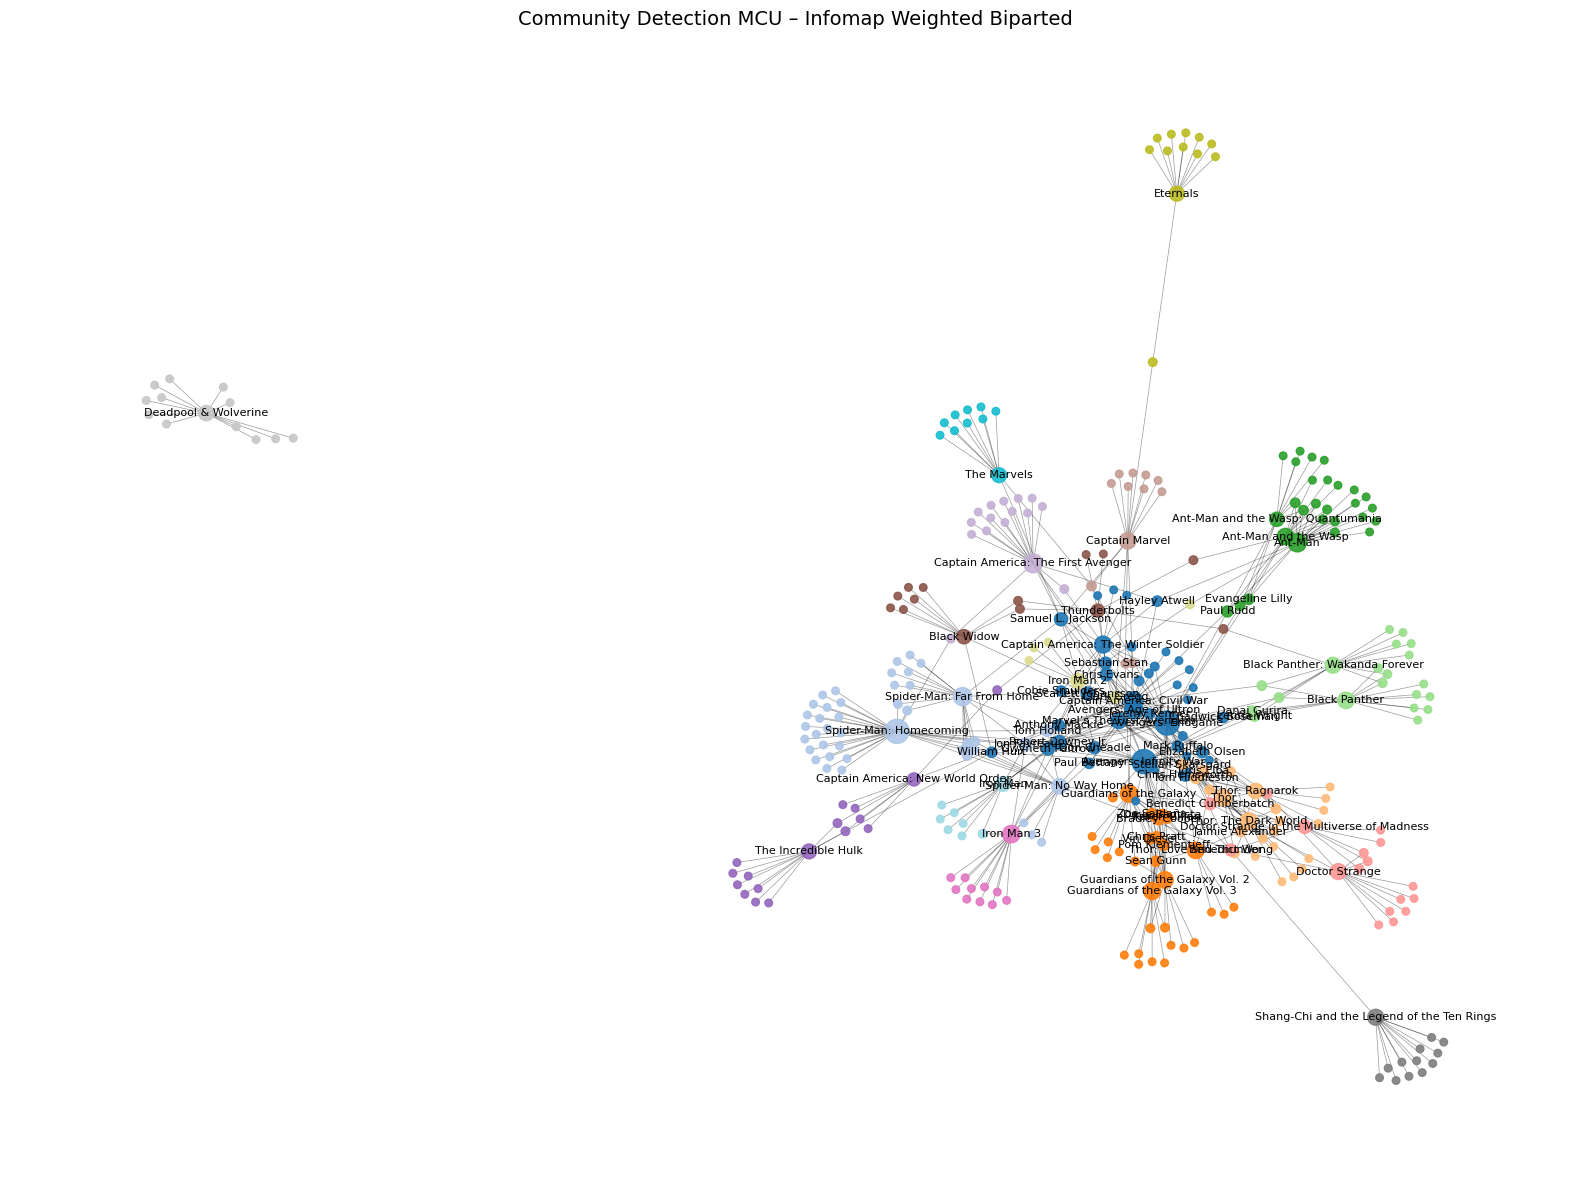

In [ ]:

# 5. Visualisasi

pos = nx.spring_layout(B, k=0.5, iterations=500, seed=42)

deg_w = dict(B.degree(weight='weight'))
mn, mx = min(deg_w.values()), max(deg_w.values())
size = lambda d: 30 if mx == mn else 30 + (d-mn)/(mx-mn)*(300-30)
node_size = [size(deg_w[n]) for n in B]
colors     = [partition[n] for n in B]

plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(B, pos,
                       node_color=colors, cmap=plt.cm.tab20,
                       node_size=node_size, alpha=0.9)

edge_w = [0.2 + 0.3*B[u][v]['weight'] for u, v in B.edges()]
nx.draw_networkx_edges(B, pos, width=edge_w, alpha=0.4)

important = [n for n in B if deg_w[n] > 3]
nx.draw_networkx_labels(B, pos,
                        labels={n: n for n in important},
                        font_size=8)

plt.title("Community Detection MCU – Infomap Weighted Biparted", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()
